In [52]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
%matplotlib inline
import random
import matplotlib.pyplot as plt
from tensorflow.keras import layers as layers
from tensorflow.keras import models as models

In [25]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [26]:
#
# Helper function to show a list of images with their relating titles
#
def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0]        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1


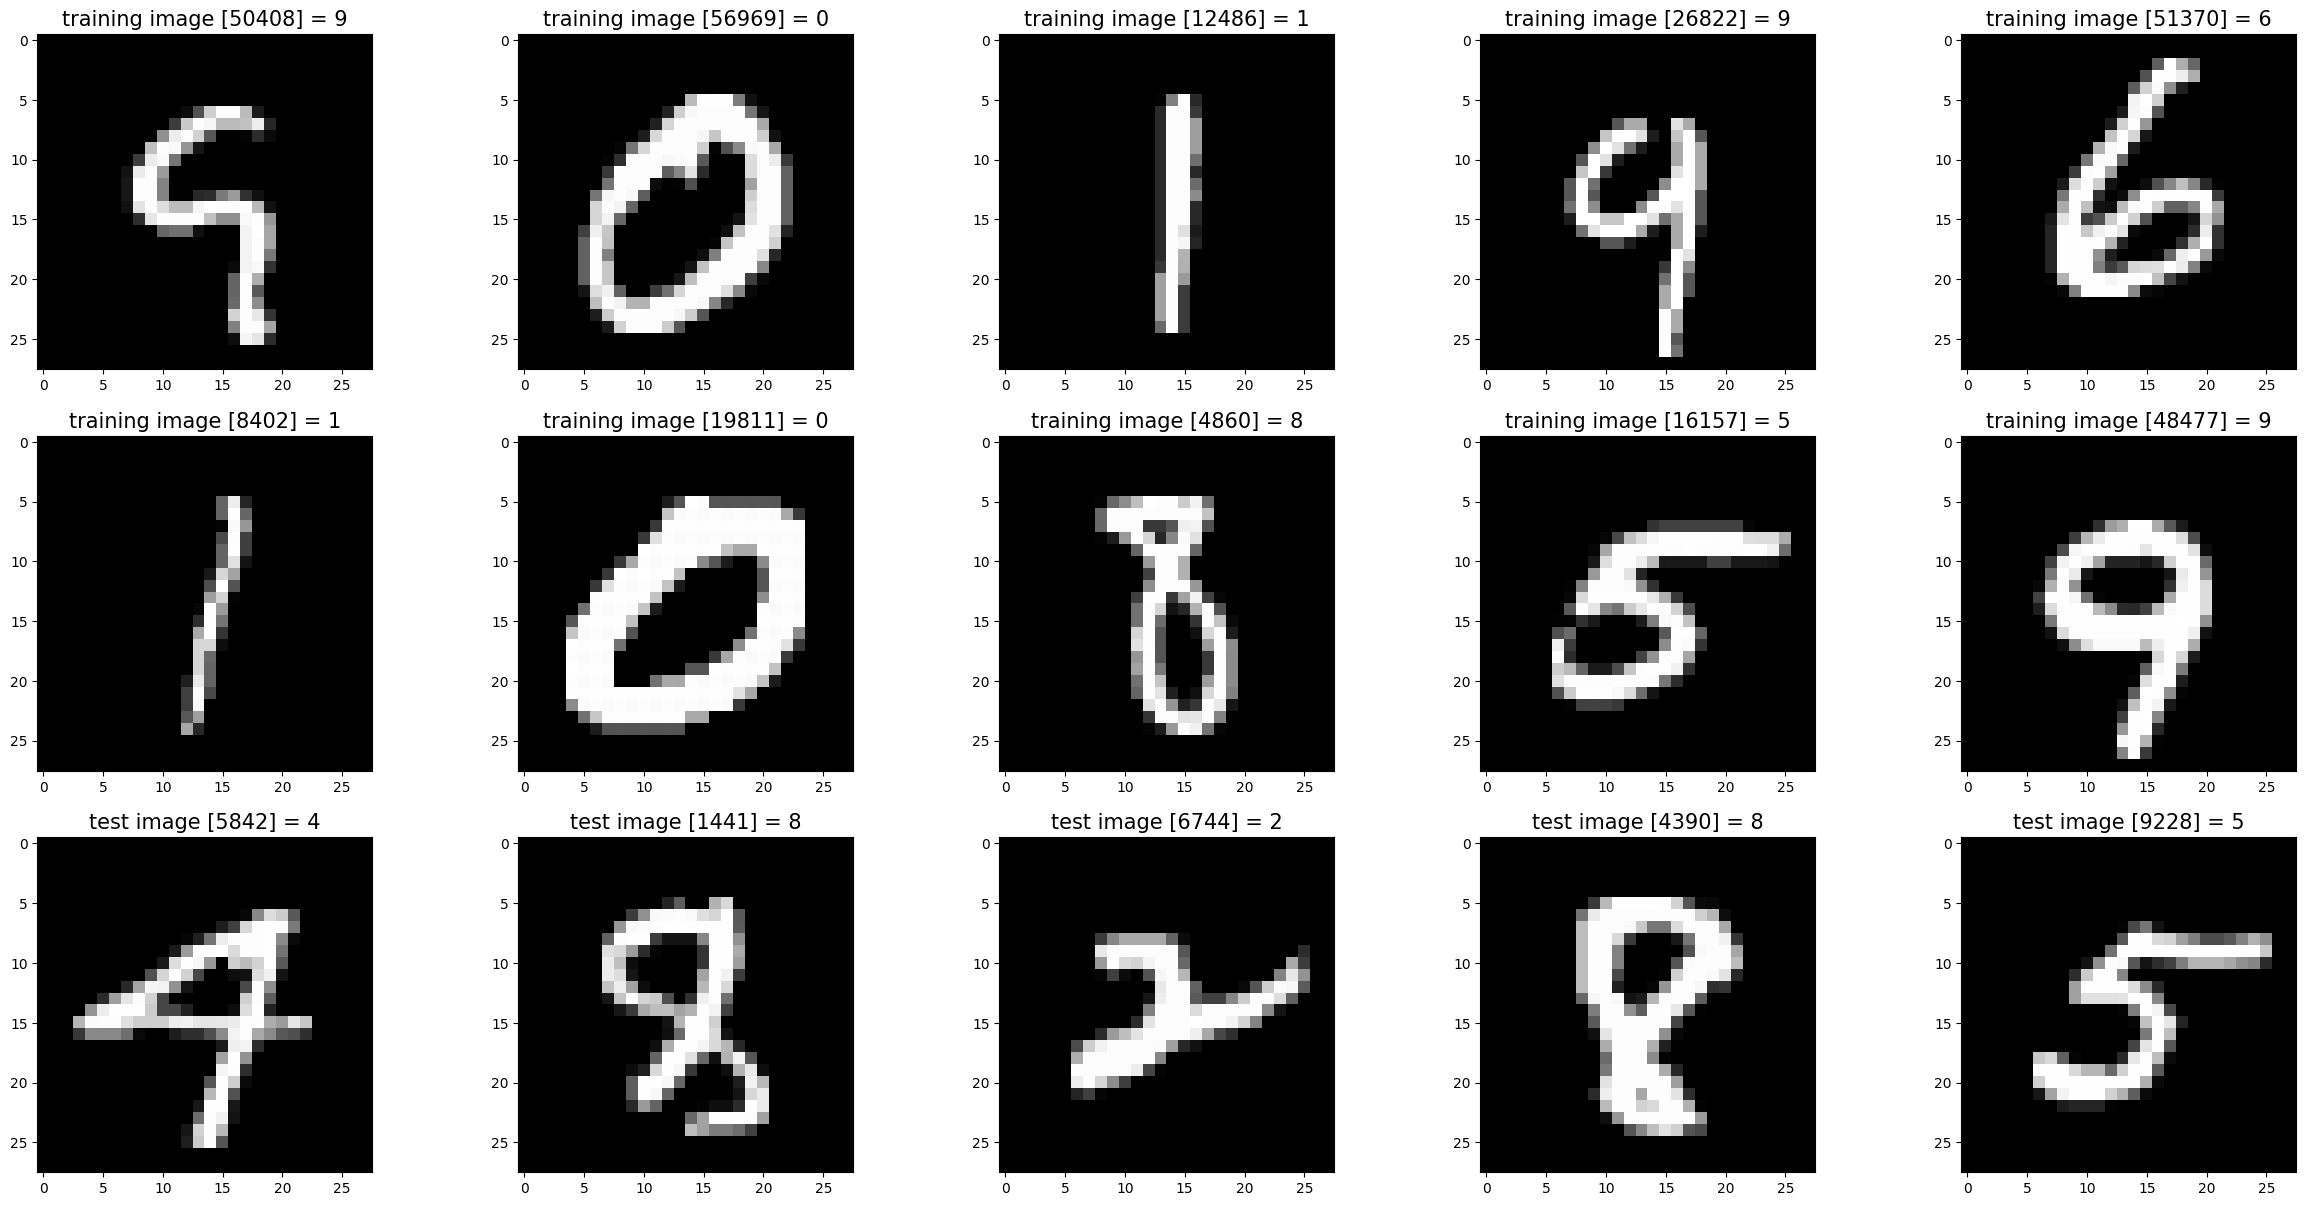

In [27]:
images_2_show = []
titles_2_show = []
for i in range(0, 10):
    r = random.randint(1, 60000)
    images_2_show.append(x_train[r])
    titles_2_show.append('training image [' + str(r) + '] = ' + str(y_train[r]))    

for i in range(0, 5):
    r = random.randint(1, 10000)
    images_2_show.append(x_test[r])        
    titles_2_show.append('test image [' + str(r) + '] = ' + str(y_test[r]))    

show_images(images_2_show, titles_2_show)

In [28]:
print('x_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)
print('x_test shape: ', x_test.shape)
print('y_test shape: ', y_test.shape)
print('\n')
print('data about x_train: ')
print('min: ', x_train.min())
print('max: ', x_train.max())
print('mean: ', x_train.mean())

x_train shape:  (60000, 28, 28)
y_train shape:  (60000,)
x_test shape:  (10000, 28, 28)
y_test shape:  (10000,)


data about x_train: 
min:  0
max:  255
mean:  33.318421449829934


In [29]:
x_train_proccessed = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)).astype('float32') / 255.0
y_train_proccessed = tf.keras.utils.to_categorical(y_train, num_classes=10) #np.reshape(y_train, (60000, 1)) #
x_test_proccessed = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)).astype('float32') / 255.0
y_test_proccessed = tf.keras.utils.to_categorical(y_test, num_classes=10)

print('x_train after reshape: ', x_train_proccessed.shape)
print('y_train after reshape: ', y_train_proccessed.shape)
print('x_test after reshape: ', x_test_proccessed.shape)
print('y_test after reshape: ', y_test_proccessed.shape)
print('\n')
print('data about x_train: ')
print('min: ', x_train_proccessed.min())
print('max: ', x_train_proccessed.max())
print('mean: ', x_train_proccessed.mean())

x_train after reshape:  (60000, 28, 28, 1)
y_train after reshape:  (60000, 10)
x_test after reshape:  (10000, 28, 28, 1)
y_test after reshape:  (10000, 10)


data about x_train: 
min:  0.0
max:  1.0
mean:  0.13066062


In [48]:
tf.debugging.set_log_device_placement(True)

model = models.Sequential([
    layers.Conv2D(filters=4, kernel_size=(3,3), padding='valid', activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Conv2D(filters=4,kernel_size=(3,3), padding='valid', activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(units=64,activation='relu'),
    layers.Dense(units=10, activation='softmax')
])

In [49]:
model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'], run_eagerly=True)

In [50]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print("Training on GPU")
else:
    print("Training on CPU")

tf.debugging.set_log_device_placement(True)
history = model.fit(x_train_proccessed, y_train_proccessed, batch_size=1024, epochs=4)

Training on CPU
Epoch 1/4
59/59 [==============================] - 2s 33ms/step - loss: 2.0042 - accuracy: 0.4158
Epoch 2/4
59/59 [==============================] - 2s 32ms/step - loss: 0.7333 - accuracy: 0.7961
Epoch 3/4
59/59 [==============================] - 2s 32ms/step - loss: 0.3982 - accuracy: 0.8827
Epoch 4/4
59/59 [==============================] - 2s 32ms/step - loss: 0.3041 - accuracy: 0.9100


In [43]:
test_loss, test_acc = model.evaluate(x_test_proccessed, y_test_proccessed)
print(f"Test Accuracy: {test_acc}")

313/313 [==============================] - 2s 6ms/step - loss: 0.1072 - accuracy: 0.9648
Test Accuracy: 0.9648000001907349


In [20]:
predictions = model.predict(x_test_proccessed[20:40])
print("Predicted labels:", np.argmax(predictions, axis=1))
print("True labels:     ", np.argmax(y_test_proccessed[20:40], axis=1))

1/1 [==============================] - 0s 16ms/step
Predicted labels: [9 6 6 5 4 0 7 4 0 1 3 1 3 6 7 2 7 1 2 1]
True labels:      [9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7 1 2 1]


In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 4)         40        
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 4)         0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 4)         148       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 4)           0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 64)               

In [53]:
# Check if TensorFlow is built with GPU support
print("Is TensorFlow built with GPU support? ", tf.test.is_built_with_cuda())

# List available devices
print("Available devices:")
for device in tf.config.list_physical_devices():
    print(device)

Is TensorFlow built with GPU support?  False
Available devices:
PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')
